
# Best site 
#https://towardsdatascience.com/the-triune-pipeline-for-three-major-transformers-in-nlp-18c14e20530
#

### Business Context

To build text classificaton model using a dataset which contains what corporations actually talk about on social media. The statements were labelled as into following categories - `information` (objective statements about the company or it's activities), `dialog` (replies to users, etc.), or `action` (messages that ask for votes or ask users to click on links, etc.). Our aim is to build a model to automatically categorize the text into their respective categories. You can download the dataset from [here](https://data.world/crowdflower/corporate-messaging)

### Task 1: Understanding and loading the dataset

In [1]:
# load required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



Bad key savefig.frameon in file /home/abderrazak/Téléchargements/yes/envs/stuff/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/abderrazak/Téléchargements/yes/envs/stuff/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/abderrazak/Téléchargements/yes/envs/stuff/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout

In [2]:
# load the dataset

data = pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Coursera/corporate_messaging_dfe.csv')

In [3]:
# see head of the dataset

data.head(3)

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,category,category_confidence,category_gold,id,screenname,text
0,662822308,False,finalized,3,2015-02-18T04:31:00,Information,1.0,NaN,436528000000000000,Barclays,Barclays CEO stresses the importance of regula...
1,662822309,False,finalized,3,2015-02-18T13:55:00,Information,1.0,NaN,386013000000000000,Barclays,Barclays announces result of Rights Issue http...
2,662822310,False,finalized,3,2015-02-18T08:43:00,Information,1.0,NaN,379580000000000000,Barclays,Barclays publishes its prospectus for its �5.8...


In [4]:
# observe shape of the dataset

data.shape

(3118, 11)

In [54]:
# check distribution of target column i.e. category

data.category.value_counts()

Information    1823
Action          456
Dialogue        124
Name: category, dtype: int64

In [6]:
data.groupby('category').count()

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,category_confidence,category_gold,id,screenname,text
category,,,,,,,,,,
Action,724,724,724,724,628,724,96,724,724,724
Dialogue,226,226,226,226,207,226,19,226,226,226
Exclude,39,39,39,39,38,39,1,39,39,39
Information,2129,2129,2129,2129,1938,2129,191,2129,2129,2129


In [55]:
# check distribution of the column - category_confidence
data.category_confidence.value_counts()

1.0    2403
Name: category_confidence, dtype: int64

In [56]:
# remove those observations where category_confidence < 1 and category = Exclude

data = data[(data['category_confidence'] == 1) & (data['category'] != 'Exclude')]

In [57]:
# extract features i.e the column - text and target i.e the column - category

features = data['text']
target = data['category']
print(features.shape)
print(target.shape)

(2403,)
(2403,)


### Task 2: Text preprocessing

In [58]:
# let's observe a text in the dataset, extract the first text
features[0]

'Barclays CEO stresses the importance of regulatory and cultural reform in financial services at Brussels conference  http://t.co/Ge9Lp7hpyG'

In [59]:
# now extract the third text from this dataset

features[3]

'Barclays Group Finance Director Chris Lucas is to step down at the end of the week due to ill health http://t.co/nkuHoAfnSD'

We will do the below pre-processing tasks on the text 
- tokenizing the sentences
- replace the urls with a placeholder
- removing non ascii characters
- text normalizing using lemmatization

In [60]:
# import re library for regular expressions

import re                                  # library for regular expression operations
import string                              # for string operations
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings
# Spacy preporcessing 
#Stop words
#importing stop words from English language.
import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import re 
import re 
# import nltk library

import  nltk 
# import stopwords from nltk library
from nltk.corpus import stopwords 
# download the stopwords and wordnet corpus
nltk.download('wordnet')

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()


# extract the english stopwords and save it to a variable

nltk.download('stopwords')
# import word_tokenize from nltk library
stopwords = stopwords.words('english')

# import WordNetLemmatizer from nltk library
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 

# write a regular expression to identify urls in text
url_regex = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

# write a regular expression to identify non-ascii characters in text
non_ascii_regex = r'[^\x00-\x7F]+'

# write a function to tokenize text after performing preprocessing 
def tokenize(text):
    
    # use library re to replace urls by token - urlplaceholder
    text = re.sub(url_regex, 'urlplaceholder', text)
    
    # use library re to replace non ascii characters by a space
    text = re.sub(non_ascii_regex, ' ', text)

    # use word_tokenize to tokenize the sentences
    mytokens = nlp(text)
    
    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]
    

    # return the tokens
    return mytokens

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/abderrazak/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/abderrazak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Task 3: EDA

In this task, we will do exploratory data analysis to check if there is any new feature that we can generate based on the existing text that we have in the dataset

**Hypothesis 1:** The length of the text in each category might be different from each other
<br>**Hypothesis 2:** The total number of URLs that are present in text might be different in each category

<AxesSubplot:xlabel='category', ylabel='length'>

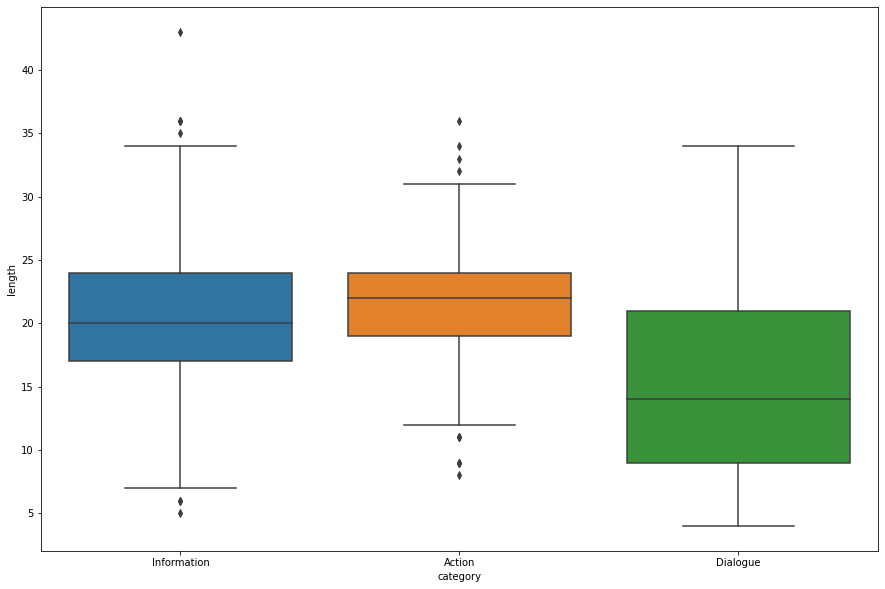

In [61]:
# create a new column in the original dataset - 'length' to capture length of each text
data['length'] = data['text'].apply(lambda x: len(nlp(x))) 

# use seaborn boxplot to visualize the pattern in length for each category
plt.figure(figsize=(15,10))
sns.boxplot(x="category", y="length", data=data)

In [14]:
# create a new column in the original dataset - 'url_count' to capture total count of urls present in each text
data['url_count'] = data['text'].apply(lambda x: len(re.findall(url_regex,x) ))


# use pandas crosstab to see the distibution of different url counts in each category
pd.crosstab(data.category,data.url_count, normalize= True )

url_count,0,1,2
category,,,
Action,0.014565,0.166042,0.009155
Dialogue,0.032876,0.018727,0.000000
Information,0.205576,0.533916,0.019143


### Task 4: Creating custom transformers

An estimator is any object that learns from data, whether it's a classification, regression, or clustering algorithm, or a transformer that extracts or filters useful features from raw data. Since estimators learn from data, they each must have a `fit` method that takes a dataset.

There are two kinds of estimators - `Transformer Estimators` i.e. transformers in short and `Predictor Estimators` i.e. predictor in short. In transformers we also need to have another method `transform` and predictors need to have another method `predict`.

Some examples of `transformers` are - CountVectorizer, TfidfVectorizer, MinMaxScaler, StandardScaler etc

Some examples of `predictors` are - LinearRegression, LogisticRegression, RandomForestClassifier etc

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [16]:
# create a custom transformer LengthExtractor to extract length of each sentences
class LengthExtractor(BaseEstimator, TransformerMixin):
    """Takes in dataframe, extracts road name column, outputs average word length"""

    def compute_length(self, text):
        """Helper code to compute the  length of a text """
        mytokens_list= nlp(text)
        return len(mytokens_list)
    
    def fit(self, x, y=None):
        """Returns `self` unless something different happens in train and test"""
        return self

    def transform(self,x, y=None):
        """The workhorse of this feature extractor"""
        X_length = pd.Series(x).apply(self.compute_length) 
        return pd.DataFrame(X_length )
  

In [17]:
# create a custom transformer UrlCounter to count number of urls in each sentences
class UrlExtractor(BaseEstimator, TransformerMixin):
    """Takes in dataframe, extracts UrlCount"""
    
    def Urlcount(self, text):
        """Helper code to compute the  count of url """
        urls= re.findall(url_regex,text)
        return len(urls)

    def fit(self, x, y=None):
        """Returns `self` unless something different happens in train and test"""
        return self

    def transform(self,x, y=None):
        """The workhorse of this feature extractor"""
        Url_count = pd.Series(x).apply(self.Urlcount) 
        return pd.DataFrame(Url_count)

### Task 5: Model Building using FeatureUnion

Feature union applies a list of transformer objects in parallel to the input data, then concatenates the results. This is useful to combine several feature extraction mechanisms into a single transformer.

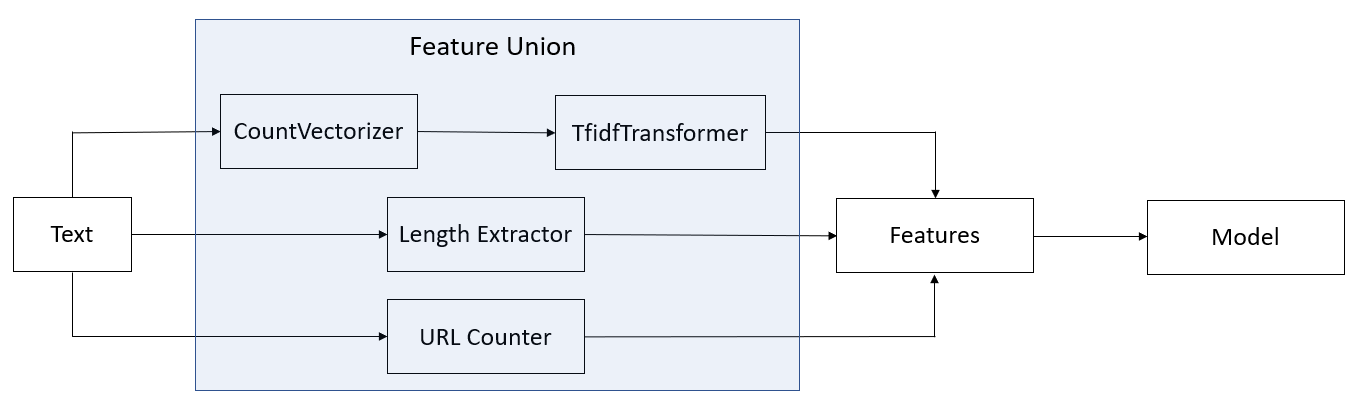

In [18]:
# import RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# import Pipeline and FeatureUnion from sklearn
from sklearn.pipeline import Pipeline, FeatureUnion

# import CountVectorizer, TfidfTransformer from sklearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [62]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import tensorflow as tf 
features = data['text']
target = data['category']
#### Create the encoder.
encoder = LabelEncoder()

encoder.fit(target)   # Assume for simplicity all features are categorical.

target_le = encoder.transform(target)

target_oh =tf.keras.utils.to_categorical(target_le)

print("target_le",target_le.shape)

print("target_oh",target_oh.shape)

print(encoder.classes_)

target_le (2403,)
target_oh (2403, 3)
['Action' 'Dialogue' 'Information']


In [63]:
# split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(features, target_oh, test_size = 0.3,random_state=1)


In [21]:
# create an instance of Pipeline class
pipeline = Pipeline([
    
        # create a FeatureUnion pipeline
        ('features', FeatureUnion([

            # add a pipeline element to extract features using CountVectorizer and TfidfTransformer
            ('Text_pipeline', Pipeline([
            ('vect', CountVectorizer(tokenizer=tokenize)),
             ('tfidf', TfidfTransformer())
             ])),
            # add the pipeline element - LengthExtractor to extract lenght of each sentence as feature
            ('text_length', LengthExtractor()),
            
            # add another pipeline element - UrlCounter to extract url counts in each sentence as feature
             ('Url_count', UrlExtractor())
          ])),
        # use the predictor estimator RandomForestClassifier to train the model
         ('clf', RandomForestClassifier())
        ])


In [22]:
# use pipeline.fit method to train the model
# train classifier
pipeline.fit(X_train, y_train)


Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('Text_pipeline',
                                                 Pipeline(steps=[('vect',
                                                                  CountVectorizer(tokenizer=<function tokenize at 0x7f4097fb3510>)),
                                                                 ('tfidf',
                                                                  TfidfTransformer())])),
                                                ('text_length',
                                                 LengthExtractor()),
                                                ('Url_count',
                                                 UrlExtractor())])),
                ('clf', RandomForestClassifier())])

### Task 6: Model Evaluation

Now, once the model is trained, in this task we will evaluate how the model behaves in the test data

In [23]:
# use the method pipeline.predict on X_test data to predict the labels

y_pred=pipeline.predict(X_test)

In [24]:
# create the confustion matrix, import confusion_matrix from sklearn

from sklearn.metrics import classification_report,confusion_matrix 
# count the number of labels
labels= np.unique(y_train)

labels

array([0., 1.], dtype=float32)

[Text(0, 0.5, 'Action'), Text(0, 1.5, 'Dialogue')]

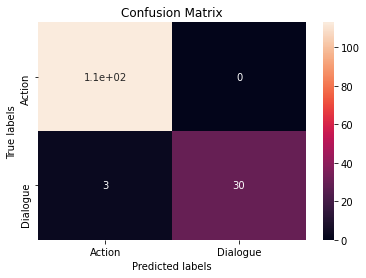

In [25]:
# use sns.heatmap on top of confusion_matrix to show the confusuin matrix

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1),labels=labels), annot=True,ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Action' ,'Dialogue'])
ax.yaxis.set_ticklabels(['Action' ,'Dialogue'])

In [26]:
# create the classification report, import classification_report from sklearn


# apply the function classification_report on y_test, y_pred and print it
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85       147
           1       1.00      0.71      0.83        42
           2       0.92      0.98      0.95       532

   micro avg       0.93      0.92      0.93       721
   macro avg       0.96      0.82      0.88       721
weighted avg       0.94      0.92      0.93       721
 samples avg       0.92      0.92      0.92       721



/home/abderrazak/Téléchargements/yes/envs/stuff/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Task 7: Conclusion and next steps

How to improve this model - 

- hyper parameter tuning
- more feature engineering
- feature selection
- trying different predictors

# Embedding Transformer 

In [27]:
# Embedding 
path_to_word_vectors = "/Users/jlee/glove.6B.50d.txt"
def load_glove(path_to_word_vectors):
    f = open(path_to_word_vectors, "r")
    word2vec = {}
    for line in f:
        split_line = line.split()
        word = split_line[0]
        embedding = np.array([float(val) for val in split_line[1:]])
        model[word] = embedding
    return word2vecword2vec = load_glove(path_to_word_vectors)

SyntaxError: invalid syntax (<ipython-input-27-3b53ec8cb9da>, line 11)

In [1]:
import spacy 
from sklearn.base import BaseEstimator, TransformerMixin
nlp = spacy.load("en_core_web_md")  # this model will give you 300 D
class SpacyVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, nlp):
        self.nlp = nlp
        self.dim = 300

    def fit(self, X, y):
        return self

    def transform(self, X):
        # Doc.vector defaults to an average of the token vectors.
        # https://spacy.io/api/doc#vector
        return [self.nlp(text).vector for text in X]

In [2]:
embeddings_pipeline = Pipeline(
    steps=[
        ("mean_embeddings", SpacyVectorTransformer(nlp)),
        ("reduce_dim", TruncatedSVD(50)),
        ("classifier", RandomForestClassifier()),
    ]
)embeddings_pipeline.fit(train_data, train_target)
y_pred = embeddings_pipeline.predict(test_data)
cr = classification_report(test_target, y_pred)

SyntaxError: invalid syntax (<ipython-input-2-915648b398d1>, line 7)

In [ ]:
https://explosion.ai/blog/spacy-deep-learning-keras
https://towardsdatascience.com/hands-on-nlp-deep-learning-model-preparation-in-tensorflow-2-x-2e8c9f3c7633

# DeepLearning :

# Clean data 

In [64]:
# Clean our tweetes
data['text_cleaned'] = data.text.apply(tokenize)

In [67]:
features[0:3]

0    [barclays, ceo, stress, importance, regulatory...
1    [barclay, announce, result, right, issue, urlp...
2    [barclays, publish, prospectus, 5.8bn, rights,...
Name: text_cleaned, dtype: object

In [49]:
# joining with "_" 
data['text_cleaned_join']= data["text_cleaned"].str.join(" ") 
data['text_cleaned'][0:3]

0    b a r c l a y s   c e o   s t r e s s   i m p ...
1    b a r c l a y   a n n o u n c e   r e s u l t ...
2    b a r c l a y s   p u b l i s h   p r o s p e ...
Name: text_cleaned, dtype: object

In [41]:

nlp = spacy.load('en_core_web_sm')
nlp.vocab.__len__()

489

In [79]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.layers import Flatten
from numpy import array
import tensorflow as tf

from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
layers = tf.keras.layers
# Import relevant classes/functions
from tensorflow.keras.preprocessing.text import  Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
data['text_cleaned_join']= data["text_cleaned"].str.join(" ") 
# Transform the list of sentences into a list of words
all_words = ' '.join(data['text_cleaned_join']).split(' ')
#all_words=[w for w in DOC ]
# Get number of unique words
vocab_size = len(set(all_words))
print(vocab_size)


5612


In [82]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display
import base64
import string
import re
from collections import Counter
from time import time
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from nltk.corpus import stopwords
from sklearn.metrics import log_loss
# Count all unique words
eap_counts = Counter(all_words )# Count all unique words
len(eap_counts)

5612

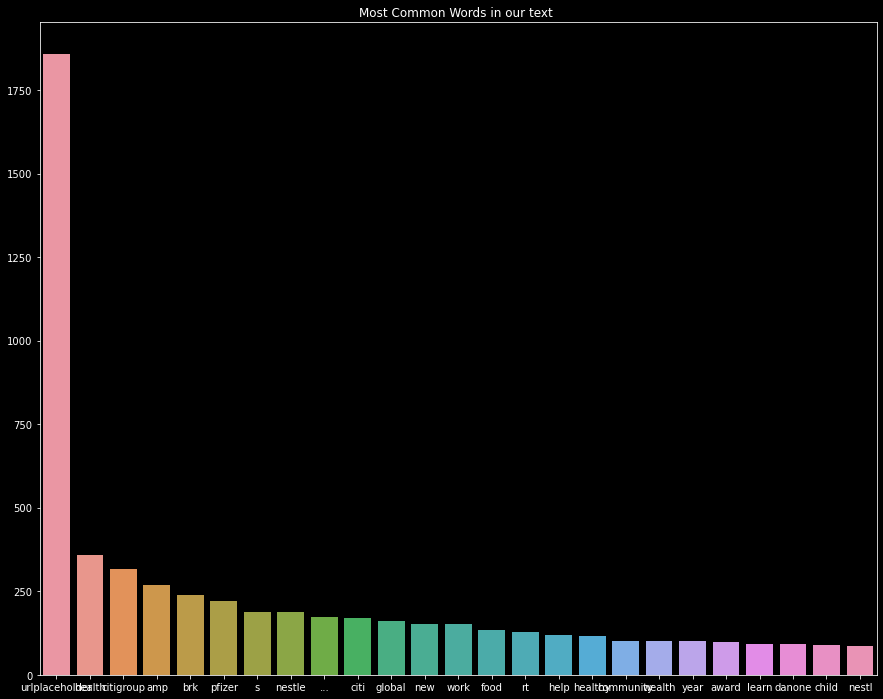

In [84]:

eap_common_words = [word[0] for word in eap_counts.most_common(25)]
eap_common_counts = [word[1] for word in eap_counts.most_common(25)]
# Use spooky background
plt.style.use('dark_background')
plt.figure(figsize=(15, 12))

sns.barplot(x=eap_common_words, y=eap_common_counts)
plt.title('Most Common Words in our text ')
plt.show()

# Preprocess


In [92]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import tensorflow as tf 
features =data['text_cleaned_join']
target = data['category']


In [94]:
# split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3,random_state=1)


# 1-Train data

In [95]:
import nltk
nltk.download('punkt')

#embeded sentences 
from tensorflow.keras.preprocessing.text import Tokenizer

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)
vocab_length = len(word_tokenizer.word_index) + 1
# Prepare the data
embedded_train_data = word_tokenizer.texts_to_sequences(X_train)
#padded sentences 
from nltk.tokenize import word_tokenize
word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(X_train, key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))
padded_train_data= pad_sequences(embedded_train_data, length_long_sentence, padding='post')
# Prepare the labels

# Create the encoder.
encoder = LabelEncoder()

encoder.fit(y_train)   

y_train_le = encoder.transform(y_train)
y_test_le = encoder.transform(y_test)
y_train_oh =tf.keras.utils.to_categorical(y_train_le)
y_test_oh = tf.keras.utils.to_categorical(y_test_le)

train_labels=y_train_oh 
#prep_labels = tf.keras.utils.to_categorical(tweets.sentiment)
print(padded_train_data[0],train_labels[0])
# Print the shapes
print(str(vocab_length))
print(str(length_long_sentence))
print(padded_train_data.shape)
print(train_labels.shape)



[  26   18   62 1019 2150 1349  487    1    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0] [0. 0. 1.]
4544
23
(1682, 23)
(1682, 3)


[nltk_data] Downloading package punkt to /home/abderrazak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 2-Test Data

In [96]:
#embeded sentences 
from tensorflow.keras.preprocessing.text import Tokenizer
# Prepare the data
embedded_test_data = word_tokenizer.texts_to_sequences(X_test)
#padded sentences 

padded_test_data= pad_sequences(embedded_test_data, length_long_sentence, padding='post')
# Prepare the labels
test_labels=y_test_oh  
#prep_labels = tf.keras.utils.to_categorical(tweets.sentiment)
print(padded_test_data[0],test_labels[0])
# Print the shapes


print(padded_test_data.shape)
print(test_labels.shape)

[635 237 292  10  97  92  40  23  63  98 102  52  82   1   0   0   0   0
   0   0   0   0   0] [1. 0. 0.]
(721, 23)
(721, 3)


In [100]:
# custumise our embeded  matrix or import GLOVE that accelearate the training process 
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/home/abderrazak/ALLINHERE/NLP/Coursera/Glove/glove.6B.300d.txt', encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
 # embeddings_dictionary now contains words and corresponding GloVe embeddings for all the words.   

In [101]:
X_train_dl= padded_train_data # the features we want to analyze
X_test_dl=padded_test_data
y_train_dl=train_labels
y_test_dl =test_labels
print(X_train_dl.shape , X_test_dl.shape)
print(y_train_dl.shape,y_test_dl.shape)



(1682, 23) (721, 23)
(1682, 3) (721, 3)



# Transfer learing

Transfer learning provides a initial knowledge of the meaning of the words, and you can see that the model that used pre-trained embeddings started with higher accuracy. Of course, the model without transfer learning is learning directly from the corpus and is more specialized on the vocabulary present in the corpus, while the word embeddings used from transfer learning are more generic. By training the embeddings directly on the corpus, the model can be even better than the one initialized with the weights from transfer learning, but in many cases the computer power to train embeddings in a very big dataset is prohibitive.

The pre-trained vectors used were the GloVE with 300 dimension


In [102]:
embedding_matrix = zeros((vocab_length, 300))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
#embedding_matrix now contains pretrained word embeddings for the words in our corpus.

In [103]:

# Modeling
# 1-Simple RNN


from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Multiply, Add, LSTM, LeakyReLU
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint



In [123]:
# Build and compile the model
wordvec_dim=300
model_RNN = tf.keras.Sequential(name='model_RNN')
model_RNN.add(layers.Embedding(vocab_length, output_dim=wordvec_dim, weights=[embedding_matrix], input_length=length_long_sentence, trainable=False))
model_RNN.add(LSTM(128, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))
model_RNN.add(LSTM(128, return_sequences=False, dropout=0.1, recurrent_dropout=0.1))
model_RNN.add(Dense(16))
model_RNN.add(Dropout(rate=0.2))
model_RNN.add(Dense(3, activation='softmax'))
model_RNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Fit the Model

min_delta : minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.

patience : number of epochs with no improvement after which training will be stopped.


In [126]:
# configure early stopping
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="/home/abderrazak/ALLINHERE/NLP/Coursera/logs")
es = EarlyStopping(monitor='loss',min_delta=0.0000000000000000001, patience=10)
history_model_RNN =model_RNN.fit(X_train_dl, y_train_dl, batch_size=64, epochs=10000, verbose=0,callbacks=[es,tensorboard_callback ],validation_split=0.05)

In [128]:
 %reload_ext tensorboard


In [129]:
%tensorboard --logdir /home/abderrazak/ALLINHERE/NLP/Coursera/logs

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2020-11-15 23:38:40.115017: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2020-11-15 23:38:40.115064: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
W1115 23:38:41.369128 139623395010304 plugin_event_accumulator.py:322] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W1115 23:38:41.390326 139623395010304 plugin_event_accumulator.py:322] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Traceback (most recent call last):
  File "/home/ab

Accuracy_RNN_model: 93.065184
loss_RNN_model: 75.325054


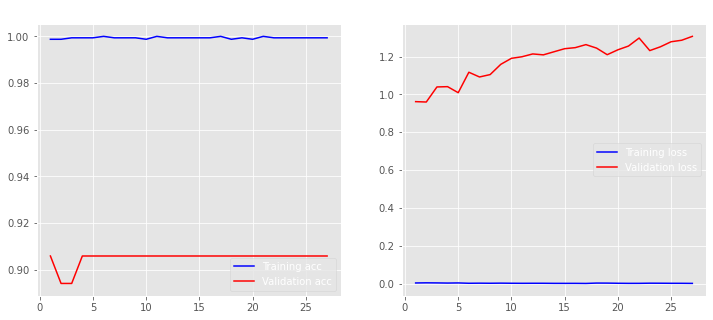

In [116]:
loss_RNN, accuracy_RNN = model_RNN.evaluate( X_test_dl, y_test_dl, verbose=0)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)Basic Sentiment Analysis with TensorFlow
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history_model_RNN)
print('Accuracy_RNN_model: %f' % (accuracy_RNN*100))
print('loss_RNN_model: %f' % (loss_RNN*100))


# 2-Hybrid CNN-LSTM:

Convolutional neural networks have been found to work well with text data ,the CNN Model for feature extraction

LSTM Model for interpreting the features across time steps.


In [107]:
#Convolutional neural networks have been found to work well with text data ,the CNN Model for feature extraction 
#LSTM Model for interpreting the features across time steps.
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Multiply, Add, LSTM, LeakyReLU
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
wordvec_dim=300
model_CNN_LSTM = tf.keras.Sequential(name='model_CNN_LSTM')
model_CNN_LSTM.add(layers.Embedding(vocab_length, output_dim=wordvec_dim, weights=[embedding_matrix], input_length=length_long_sentence, trainable=False))
model_CNN_LSTM.add(layers.Conv1D(200, 7, activation='relu',padding='same'))
model_CNN_LSTM.add(layers.MaxPooling1D(pool_size=4))
model_CNN_LSTM.add(LSTM(128, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))
model_CNN_LSTM.add(LSTM(128, return_sequences=False, dropout=0.1, recurrent_dropout=0.1))
model_CNN_LSTM.add(Dense(16))
model_CNN_LSTM.add(Dropout(rate=0.2))
model_CNN_LSTM.add(Dense(3, activation='softmax'))
model_CNN_LSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_CNN_LSTM.summary())

Model: "model_CNN_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 23, 300)           1363200   
_________________________________________________________________
conv1d (Conv1D)              (None, 23, 200)           420200    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 128)            168448    
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2064      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)             

Accuracy_CNN_LSTM_model: 90.707350
loss_CNN_LSTM_model: 95.351398


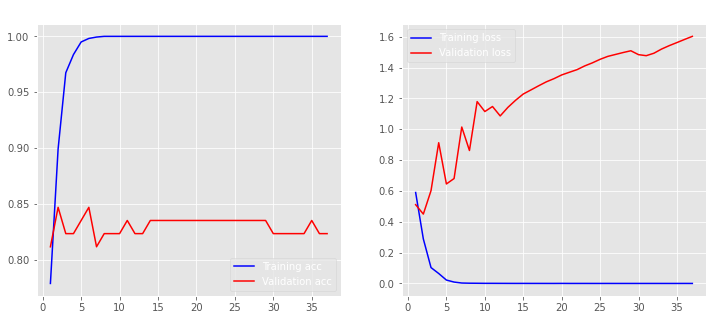

In [108]:
# configure early stopping
Basic Sentiment Analysis with TensorFlow
es = EarlyStopping(monitor='loss',min_delta=0.00000000000000001, patience=10)
history_model_CNN_LSTM =model_CNN_LSTM.fit(X_train_dl, y_train_dl, batch_size=64, epochs=1000, verbose=0,callbacks=[es],validation_split=0.05)


loss_CNN_LSTM, accuracy_CNN_LSTM = model_CNN_LSTM.evaluate( X_test_dl, y_test_dl, verbose=0)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history_model_CNN_LSTM )
print('Accuracy_CNN_LSTM_model: %f' % (accuracy_CNN_LSTM *100))
print('loss_CNN_LSTM_model: %f' % (loss_CNN_LSTM *100))



In [ ]:
from tensorflow.keras import 